## This notenook for make fraud Detection system

In [2]:
import pandas as pd 
import numpy as np
import sys

In [2]:
#reading the data
df = pd.read_csv('Data.csv')

In [3]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


## Column Key

### - type
Describes the kind of transaction:
- **CASH-IN**: Money deposited into an account.
- **CASH-OUT**: Money withdrawn from an account.
- **DEBIT**: Direct deduction for purchases or bills.
- **PAYMENT**: Payment for goods, services, or bills.
- **TRANSFER**: Money moved between accounts.

### - amount
The amount of money involved in the transaction.

### - nameOrig
The unique ID of the account initiating the transaction.

### - oldbalanceOrg
The balance of the origin account before the transaction.

### - newbalanceOrig
The balance of the origin account after the transaction.

### - nameDest
The unique ID of the account receiving the transaction.

### - oldbalanceDest
The balance of the destination account before the transaction.

### - newbalanceDest
The balance of the destination account after the transaction.

### - isFraud
Indicates if the transaction is fraudulent (1) or not (0).

### - isFlaggedFraud
Indicates if the transaction was flagged as suspicious by the system (1) or not (0).

In [3]:
data=df.copy()

In [ ]:
#make label encodeig to type object columns
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data["type"] = label_encoder.fit_transform(data["type"])

In [8]:
#splitting the data into train and test sets data_train , data_test using sklearn
from sklearn.model_selection import train_test_split
data_train, data_test = train_test_split(data, test_size=0.2, random_state=42,stratify=data['isFraud'])


In [10]:
data_train.drop(columns=['nameOrig','nameDest'],axis=1,inplace=True)
data_test.drop(columns=['nameOrig','nameDest'],axis=1,inplace=True)

In [12]:
data_test.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
4051353,300,4,890577.21,218.00,0.00,0.00,890577.21,0,0
5746321,399,0,97734.24,2096258.84,2193993.08,320136.00,222401.76,0,0
6361797,718,3,5907.41,315.00,0.00,0.00,0.00,0,0
2247309,186,1,187696.30,11057.00,0.00,1798095.21,1985791.51,0,0
4692207,331,1,82646.52,0.00,0.00,1047805.87,1130452.39,0,0


In [13]:
# Alternative approach using SMOTE for training data
from imblearn.over_sampling import SMOTE

# Prepare training data
X_train = data_train.drop(['isFraud'], axis=1)
y_train = data_train['isFraud']

# Apply SMOTE to training data only
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

print(f"Original training distribution: {y_train.value_counts()}")
print(f"Balanced training distribution: {pd.Series(y_train_balanced).value_counts()}")

Original training distribution: isFraud
0    5083526
1       6570
Name: count, dtype: int64
Balanced training distribution: isFraud
0    5083526
1    5083526
Name: count, dtype: int64


In [14]:
# Alternative approach using SMOTE for training data
from imblearn.over_sampling import SMOTE

# Prepare training data
X_test = data_test.drop(['isFraud'], axis=1)
y_test = data_test['isFraud']

# Apply SMOTE to training data only
smote = SMOTE(random_state=42)
X_test_balanced, y_test_balanced = smote.fit_resample(X_test, y_test)

print(f"Original testing distribution: {y_test.value_counts()}")
print(f"Balanced testing distribution: {pd.Series(y_test_balanced).value_counts()}")

Original testing distribution: isFraud
0    1270881
1       1643
Name: count, dtype: int64
Balanced testing distribution: isFraud
0    1270881
1    1270881
Name: count, dtype: int64


In [ ]:
X_train_balanced.drop(columns=['isFlaggedFraud'], axis=1, inplace=True)

In [36]:
X_test_balanced.drop(columns=['isFlaggedFraud'], axis=1, inplace=True)

In [39]:
y_train_balanced.value_counts()

isFraud
0    5083526
1    5083526
Name: count, dtype: int64

In [20]:
#checking the data types
print(X_train_balanced.dtypes)
#checking the null values
X_train_balanced.isnull().sum()

step                int64
type                int64
amount            float64
oldbalanceOrg     float64
newbalanceOrig    float64
oldbalanceDest    float64
newbalanceDest    float64
dtype: object


step              0
type              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
dtype: int64

In [6]:
numircal_features = data.select_dtypes(include=['int64', 'float64']).columns
categorical_features = data.select_dtypes(include=['object']).columns

In [16]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [48]:
data.duplicated().sum()

np.int64(0)

In [20]:
numircal_features

Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud', 'isFlaggedFraud'],
      dtype='object')

In [22]:
numircal=['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

In [49]:
categorical_features

['type', 'nameOrig', 'nameDest', 'isFraud']

In [23]:
categorical_features=['type', 'nameOrig', 'nameDest','isFraud']

In [24]:
data.shape

(6362620, 11)

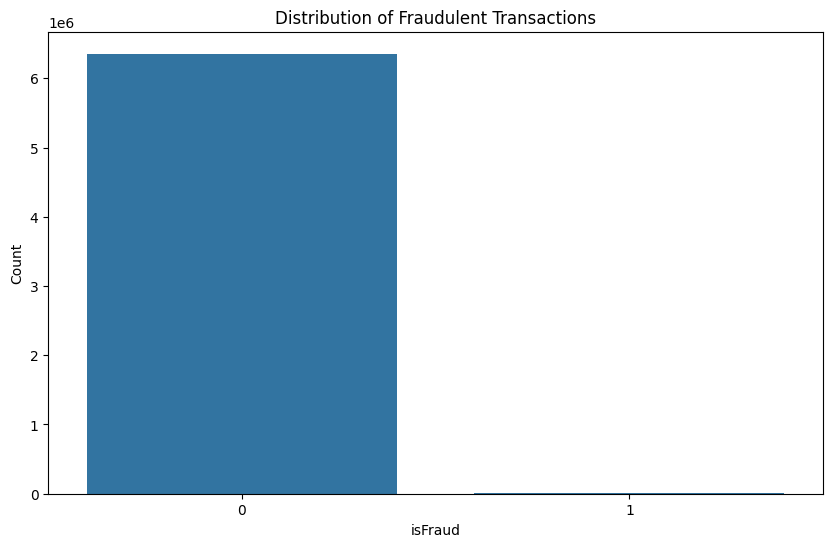

In [28]:
#draw bar plot to check imbalance in the target variable
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.countplot(x='isFraud', data=data)
plt.title('Distribution of Fraudulent Transactions')
plt.xlabel('isFraud')
plt.ylabel('Count')
plt.xticks(rotation=0)  
plt.show()

In [50]:
#count number of each class in the target variable
data['isFraud'].value_counts()


isFraud
0    6354407
1       8213
Name: count, dtype: int64

## Up-Sampling senario

In [ ]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = data[data.isFraud == 0]
df_minority = data[data.isFraud == 1]

# Upsample minority class
df_minority_upsampled = resample(
    df_minority, 
    replace=True,                # sample with replacement
    n_samples=len(df_majority),  # match majority class
    random_state=42
)

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

# Shuffle the dataset
df_upsampled = df_upsampled.sample(frac=1, random_state=42).reset_index(drop=True)

# Check new class counts
print(df_upsampled.isFraud.value_counts())

In [6]:
df_upsampled.isnull().sum()                                                                     

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [ ]:
df_upsampled.to_csv('Data_upsampled.csv', index=False)

## Calculate class Weights

In [10]:
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight('balanced', classes=np.array([0,1]), y=data['isFraud'])
print(dict(enumerate(class_weights)))

{0: np.float64(0.5006462444095885), 1: np.float64(387.35054182393765)}


In [ ]:
#Drawing Distrpution of nuimrcal increase bins number of bins to 30
def plot_numerical_distribution(data, features):
    plt.figure(figsize=(15, 10))
    for i, feature in enumerate(features):
        plt.subplot(2, 3, i + 1)
        sns.histplot(data[feature], bins=30, kde=True)
        plt.title(f'Distribution of {feature}')
        plt.xlabel(feature)
        plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()
plot_numerical_distribution(df_upsampled, numircal_features)


In [ ]:
#Box plot to check outliers
def plot_boxplot(data, features):
    plt.figure(figsize=(15, 10))
    for i, feature in enumerate(features):
        plt.subplot(2, 3, i + 1)
        sns.boxplot(x=data[feature])
        plt.title(f'Boxplot of {feature}')
        plt.xlabel(feature)
    plt.tight_layout()
    plt.show()
plot_boxplot(df_upsampled, numircal_features)

In [ ]:
#make Robust scaling to numerical features
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
df_upsampled[numircal_features] = scaler.fit_transform(df_upsampled[numircal_features])


In [ ]:
#take log transformation to numerical features
for feature in numircal_features:
    df_upsampled[feature] = np.log1p(df_upsampled[feature])

In [ ]:
#make label encoding to type column
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_upsampled['type'] = label_encoder.fit_transform(df_upsampled['type'])


In [ ]:
#make Anova test to check the correlation between numerical features and target variable
from sklearn.feature_selection import f_classif
from scipy.stats import f_oneway
def anova_test(data, target):
    features = data.select_dtypes(include=['float64', 'int64']).columns
    results = {}
    
    for feature in features:
        f_statistic, p_value = f_classif(data[[feature]], data[target])
        results[feature] = {'F-statistic': f_statistic[0], 'p-value': p_value[0]}
    
    return pd.DataFrame(results).T
anova_results = anova_test(df_upsampled, 'isFraud')
print(anova_results)

In [ ]:
#make mutual information to check the correlation between numerical features and target variable
from sklearn.feature_selection import mutual_info_classif
def mutual_information(data, target):
    features = data.select_dtypes(include=['float64', 'int64']).columns
    mi_scores = mutual_info_classif(data[features], data[target], discrete_features=True)
    mi_results = pd.Series(mi_scores, index=features).sort_values(ascending=False)
    return mi_results
mi_results = mutual_information(df_upsampled, 'isFraud')
print(mi_results)

In [26]:
#make column transformation to numircal that make robust scaling and log transformation
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import RobustScaler
def log_transform(X):
    return np.log1p(X)
# Define the column transformer
column_transformer = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('robust_scaler', RobustScaler()),
            ('log_transform', FunctionTransformer(log_transform, validate=False))
        ]), numircal)
    ],
    remainder='passthrough'  # Keep other columns unchanged
)

In [ ]:
#make column transformer that make label encoding to type column
categorical_transformer = Pipeline(steps=[
    ('label_encoder', FunctionTransformer(lambda x: label_encoder.fit_transform(x), validate=False))
])

In [28]:
#make overall column transformer
from sklearn.compose import ColumnTransformer
overall_transformer = ColumnTransformer(
    transformers=[
        ('num', column_transformer, numircal),
    #  ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough'  # Keep other columns unchanged
)

In [29]:
#import XGBoost model 
from xgboost import XGBClassifier
# Define the XGBoost model
xgb_model = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)

In [30]:
#now, make full pipeline that include column transformer and classifier XGBoost
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
pipeline = Pipeline(steps=[
    ('transformer', overall_transformer),
    ('classifier', xgb_model)
])

In [41]:
print(len(X_train_balanced))
print(len(y_train_balanced))

10167052
10167052


In [42]:
#fit the model
pipeline.fit(X_train_balanced, y_train_balanced)

/home/ahmed-fayad/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [16:29:50] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/ahmed-fayad/.venv/lib/python3.12/site-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  ColumnTransformer(remainder='passthrough',
                                                                    transformers=[('num',
                                                                                   Pipeline(steps=[('robust_scaler',
                                                                                                    RobustScaler()),
                                                                                                   ('log_transform',
                                                                                                    FunctionTransformer(func=<function log_transform at 0x7b9ea8ac8680>))]),
                                                                                   ['amount',
                                                                                    'oldbalanceOrg',
                                                                                    'newbalanceOrig',
                                                                                    'oldbalanceDest...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [43]:
#make test the model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
y_pred = pipeline.predict(X_test_balanced)
print(classification_report(y_test_balanced, y_pred)) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       1.00      1.00      1.00   1270881

    accuracy                           1.00   2541762
   macro avg       1.00      1.00      1.00   2541762
weighted avg       1.00      1.00      1.00   2541762



In [45]:
#get confusion matrix and perscion and reacall
confusion = confusion_matrix(y_test_balanced, y_pred)
print("Confusion Matrix:")
print(confusion)
# Calculate accuracy
accuracy = accuracy_score(y_test_balanced, y_pred)
print(f"Accuracy: {accuracy:.2f}")
# Calculate precision and recall
from sklearn.metrics import precision_score, recall_score
precision = precision_score(y_test_balanced, y_pred)
recall = recall_score(y_test_balanced, y_pred)
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
# Calculate F1 score
from sklearn.metrics import f1_score
f1 = f1_score(y_test_balanced, y_pred)
print(f"F1 Score: {f1:.2f}")

Confusion Matrix:
[[1267939    2942]
 [   4528 1266353]]
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


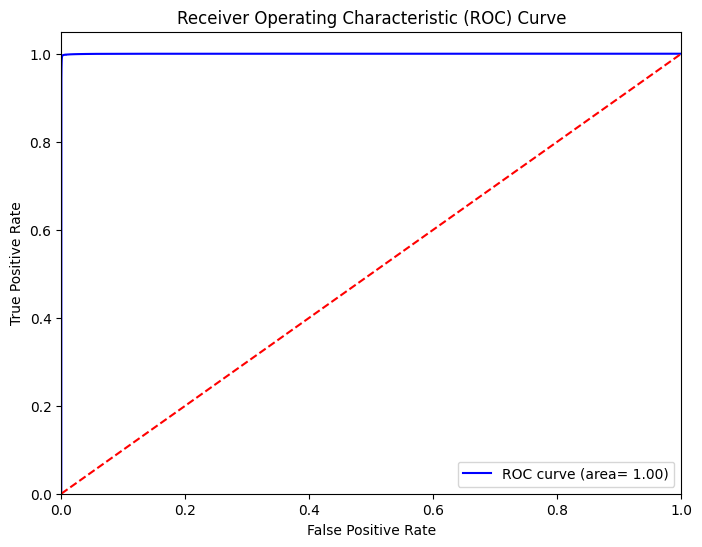

In [47]:
#plot roc curve
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test_balanced, pipeline.predict_proba(X_test_balanced)[:, 1])
# Calculate AUC
roc_auc = auc(fpr, tpr)
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area= {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [46]:
#make pickle file to save the pipeline with joblib
import joblib
joblib.dump(pipeline, 'fraud_detection_pipeline.pkl')

['fraud_detection_pipeline.pkl']